In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbodykit.lab import *
from nbodykit import cosmology

from scipy.special import spherical_jn
from scipy import integrate

In [2]:
redshift = 0.0
cosmo = cosmology.Planck15
Plin = cosmology.LinearPower(cosmo, redshift, transfer='CLASS')

In [3]:
cosmo.Omega0_lambda+cosmo.Omega0_ur+cosmo.Omega0_m+cosmo.Omega0_g

0.9999998572856914

In [4]:
cosmo.Omega0_cdm

0.2589

In [5]:
cosmo.Omega0_lambda+cosmo.Omega0_ur+cosmo.Omega0_g

0.6910961158423617

In [6]:
cosmo_SU = cosmology.cosmology.Cosmology(h=0.6774, Omega0_b=0.0486, Omega0_cdm=0.2589, 
                                                n_s=cosmo.n_s, A_s=cosmo.A_s,
                                                 P_k_max=100.)

In [7]:
Plin_SU = cosmology.LinearPower(cosmo_SU, redshift, transfer='CLASS')

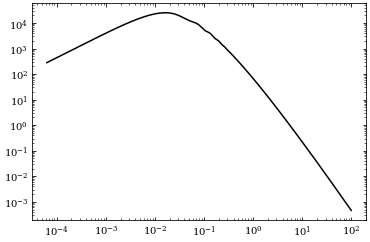

In [8]:
k = numpy.logspace(-4.2, 2, 10000)
plt.loglog(k, Plin(k), c='k', label=r'$b_1^2 P_\mathrm{lin}$')

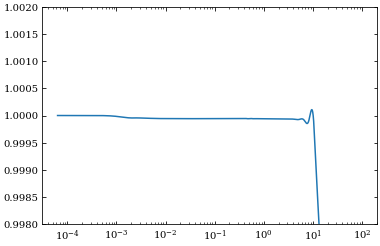

In [9]:
plt.xscale('log')
plt.ylim(0.998,1.002)
plt.plot(k, Plin_SU(k)/Plin(k))

In [10]:
R_sigma = 8

def sigma_func(kk):
    x = kk*R_sigma
    W = 3 * spherical_jn(1, x) / (x)
    factor = kk**2 /(2.*np.pi**2)
    return factor*W**2

sigma8   = integrate.simps(Plin(k)*sigma_func(k), k )

print(np.sqrt(sigma8) )

0.8158116139762954


In [11]:
Delta = k**3*Plin(k)/(2.*np.pi**2)
log10Delta = np.array([np.log10(k), np.log10(Delta)]).T
#np.savetxt('planck2015_log10Delta.dat', log10Delta)

In [12]:
Delta_SU = k**3*Plin_SU(k)/(2.*np.pi**2)
log10Delta_SU = np.array([np.log10(k), np.log10(Delta_SU)]).T
#np.savetxt('planck2015_log10Delta_SU.dat', log10Delta_SU)

In [13]:
#Omega_m = cosmo.Omega0_m
#Omega_L = cosmo.Omega0_lambda

Omega_m = 0.3089
Omega_L = 0.6911


def Hubble(a, Om, OL):
    matter = Om/(a**3)
    curv = (1-Om-OL)/(a**2)
    Lambda = OL
    return np.sqrt(matter+Lambda+curv)

def growth_int(a, Om, OL):
    return 1./(a*Hubble(a, Om, OL))**3

def growth_D(a, Om=Omega_m, OL=Omega_L):
    factor = 5.*Om*Hubble(a, Om, OL)/2
    return factor*integrate.quad(growth_int, 0, a, args=(Om, OL,))[0]

def rel_D(z):
    a = 1/(1+z)
    return growth_D(a)/growth_D(1)

In [14]:
Omega_m

0.3089

In [15]:
Omega_L

0.6911

In [16]:
def delta_H(db):
    delta_K = 5.*Omega_m*db/(3.*growth_D(1, Omega_m, Omega_L))
    return np.sqrt(1-delta_K)

def Hubble_new(db):
    return 0.6774*delta_H(db)

def Omega_m_new(db):
    return Omega_m/delta_H(db)**2

def Omega_L_new(db):
    return Omega_L/delta_H(db)**2

In [44]:
Delta = -0.21

In [18]:
250*delta_H(Delta)

250.9827425792951

In [45]:
Hubble_new(Delta)

0.7225843232963273

In [20]:
Omega_L_new(Delta)

0.6856984834552392

In [21]:
Omega_m_new(Delta)

0.30648569170789086

In [33]:
c_ppp007 = growth_D(1., Omega_m_new(0.21), Omega_L_new(0.21))/growth_D(1, Omega_m, Omega_L)
c_mmm007 = growth_D(1., Omega_m_new(-0.21), Omega_L_new(-0.21))/growth_D(1, Omega_m, Omega_L)
print(c_ppp007,c_mmm007)

1.2025132122140774 0.8577924902119319


In [34]:
c_ppp003 = growth_D(1., Omega_m_new(0.09), Omega_L_new(0.09))/growth_D(1, Omega_m, Omega_L)
c_mmm003 = growth_D(1., Omega_m_new(-0.09), Omega_L_new(-0.09))/growth_D(1, Omega_m, Omega_L)
print(c_ppp003,c_mmm003)

1.0773749032377746 0.9334118698599762


In [35]:
c_ppp0004 = growth_D(1., Omega_m_new(0.012), Omega_L_new(0.012))/growth_D(1, Omega_m, Omega_L)
c_mmm0004 = growth_D(1., Omega_m_new(-0.012), Omega_L_new(-0.012))/growth_D(1, Omega_m, Omega_L)
print(c_ppp0004,c_mmm0004)

1.0096390427270479 0.9905516203516944


In [36]:
k_ppp0004 = k/delta_H(0.012)
log10Delta_ppp0004 = np.array([np.log10(k_ppp0004), np.log10(c_ppp0004*c_ppp0004*Plin(k)*k**3/(2.*np.pi**2))]).T
np.savetxt('planck2015_log10Delta_ppp0004.dat', log10Delta_ppp0004)

In [37]:
k_mmm0004 = k/delta_H(-0.012)
log10Delta_mmm0004 = np.array([np.log10(k_mmm0004), np.log10(c_mmm0004*c_mmm0004*Plin(k)*k**3/(2.*np.pi**2))]).T
np.savetxt('planck2015_log10Delta_mmm0004.dat', log10Delta_mmm0004)

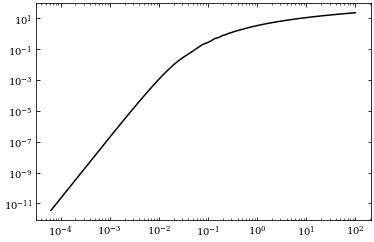

In [28]:
plt.loglog(k_ppp0004, 10**(log10Delta_mmm0004[:,1]), c='k', label=r'$b_1^2 P_\mathrm{lin}$')

In [38]:
k_ppp003 = k/delta_H(0.09)
log10Delta_ppp003 = np.array([np.log10(k_ppp003), np.log10(c_ppp003*c_ppp003*Plin(k)*k**3/(2.*np.pi**2))]).T
np.savetxt('planck2015_log10Delta_ppp003.dat', log10Delta_ppp003)

In [39]:
k_mmm003 = k/delta_H(-0.09)
log10Delta_mmm003 = np.array([np.log10(k_mmm003), np.log10(c_mmm003*c_mmm003*Plin(k)*k**3/(2.*np.pi**2))]).T
np.savetxt('planck2015_log10Delta_mmm003.dat', log10Delta_mmm003)

In [40]:
k_ppp007 = k/delta_H(0.21)
log10Delta_ppp007 = np.array([np.log10(k_ppp007), np.log10(c_ppp007*c_ppp007*Plin(k)*k**3/(2.*np.pi**2))]).T
np.savetxt('planck2015_log10Delta_ppp007.dat', log10Delta_ppp007)

In [41]:
k_mmm007 = k/delta_H(-0.21)
log10Delta_mmm007 = np.array([np.log10(k_mmm007), np.log10(c_mmm007*c_mmm007*Plin(k)*k**3/(2.*np.pi**2))]).T
np.savetxt('planck2015_log10Delta_mmm007.dat', log10Delta_mmm007)

In [67]:
c_ppp003 = growth_D(0.9696, Omega_m_new(0.09), Omega_L_new(0.09))/growth_D(1, Omega_m, Omega_L)
c_mmm003 = growth_D(1.0296, Omega_m_new(-0.09), Omega_L_new(-0.09))/growth_D(1, Omega_m, Omega_L)

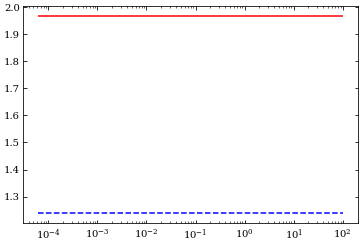

In [34]:
db = 0.03*3
Gk0 = ( c_ppp003**2 - c_mmm003**2)/(2*db)

plt.hlines([26./21.], k[0], k[-1], "blue", linestyles='dashed', label=r"$\frac{26}{21}$")     # hlines
plt.hlines([Gk0], k[0], k[-1], "red", label=r"$\frac{26}{21}$")     # hlines

#plt.ylim(1, 1.3)
#plt.plot(k, Gk0, label=r'$\Delta_0 = 0.21$')
plt.xscale('log')

In [78]:
Gk0/(26./21.)

1.0100773918492971